### Nombre: Juan Pablo Jiménez Martín
### ID: 280622

# Actividad 1

En base a los temas vistos en clase, realiza los ejercicios y responde las preguntas.

## Ejercicio:

Crea un perceptrón para predecir si a una persona se le aprueba o rechaza un crédito en base a su ahorro y su historial. Considera los siguientes datos.

|Ahorro|Historial|Aprobado|
|:-:|:-:|:-:|
|0.3|0.4|0|
|0.4|0.3|0|
|0.3|0.2|0|
|0.4|0.1|0|
|0.5|0.2|0|
|0.4|0.8|1|
|0.6|0.8|1|
|0.5|0.6|1|
|0.7|0.6|1|
|0.8|0.5|1|

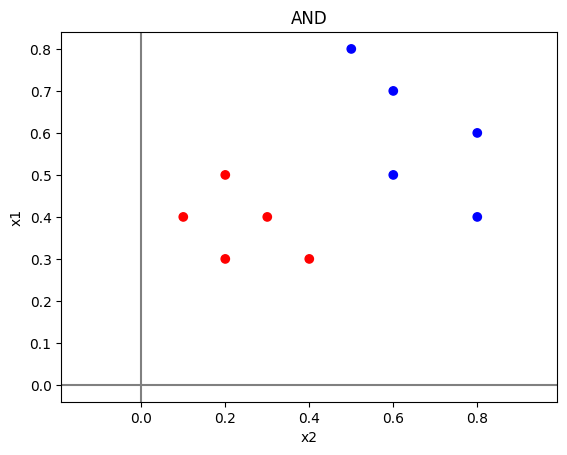

In [11]:
import matplotlib.pyplot as plt

x1 = [0.3, 0.4, 0.3, 0.4, 0.5, 0.4, 0.6, 0.5, 0.7, 0.8]
x2 = [0.4, 0.3, 0.2, 0.1, 0.2, 0.8, 0.8, 0.6, 0.6, 0.5]

y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

colors = ['blue' if i == 1 else 'red' for i in y]

plt.title('AND')
plt.axhline(color = 'grey')
plt.axvline(color = 'grey')
plt.xlabel('x2')
plt.ylabel('x1')
plt.axis('equal')
plt.scatter(x2, x1, color = colors)

In [12]:
def funcion_de_activacion(n):
    return 0 if n < 0 else 1

def salida_del_perceptron(x1, w1, x2, w2, b):
    Y = []

    for i in range(0, 4):
        n = x1[i] * w1 + x2[i] * w2 + b
        Y.append(funcion_de_activacion(n))

    return Y


In [13]:
import numpy as np

def perceptron(W1, W2, B):
    X1 = np.linspace(-2, 2, 10)
    X2 = (- X1 * W1 - B) / W2

    XX1, XX2 = np.meshgrid(X1, X1)
    Z = XX1 * W1 + XX2 * W2 + B

    Y = salida_del_perceptron(x1, W1, x2, W2, B)

    plt.title(f'Perceptron = {Y}')
    plt.axhline(color = 'grey')
    plt.axvline(color = 'grey')
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.xlabel('x2')
    plt.ylabel('x1')
    plt.contourf(XX1, XX2, Z, levels = [Z.min(), 0, Z.max()], colors = ['red', 'blue'], alpha = 0.2)
    plt.plot(X1, X2, '--', color = 'black')
    plt.scatter(x2, x1, color = colors)

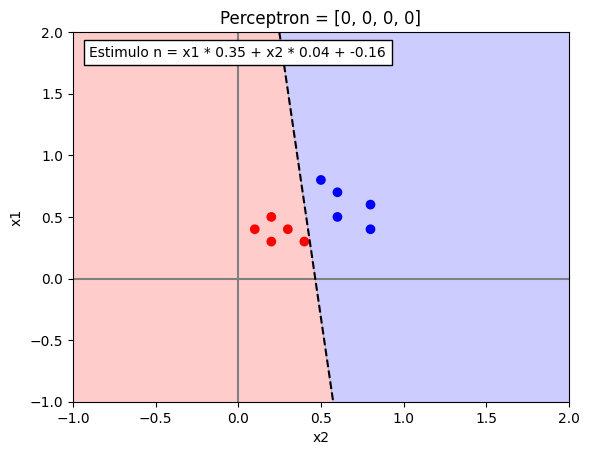

In [14]:
from IPython.display import clear_output
import random

i = 0
aprendizaje = 0.1

w1 = random.random()
w2 = random.random()
b = random.random()

while i < 4:
    Y = salida_del_perceptron(x1, w1, x2, w2, b)
    error = y[i] - Y[i]

    if error != 0:
        w1 = w1 + aprendizaje * error * x1[i]
        w2 = w2 + aprendizaje * error * x2[i]
        b = b + aprendizaje * error

        i = 0
    else:
        i += 1

    clear_output(wait = True)

    perceptron(w1, w2, b)
    plt.text(-0.9, 1.8, f'Estimulo n = x1 * {w1:.2f} + x2 * {w2:.2f} + {b:.2f}', bbox = dict(facecolor = 'white'))
    plt.show()

## Preguntas:

1. ¿Puedes utilizar un perceptrón para resolver un problema que requiere más de una frontera de decisión? Justifica tu respuesta.

Respuesta: No, un perceptrón solo puede resolver problemas linealmente separables, es decir, aquellos que pueden ser divididos por una única frontera de decisión lineal. Si el problema requiere más de una frontera de decisión (por ejemplo, problemas no linealmente separables como XOR), el perceptrón simple no es suficiente. Para estos casos se necesitan redes neuronales multicapa (MLP) que pueden aprender fronteras de decisión más complejas.


2. ¿Qué función de activación consideras más adecuada para predecir la calidad de un vino, considerando que la calidad está dada por un número en el intervalo [0, 1]? Justifica tu respuesta.

Respuesta: La función de activación sigmoide es la más adecuada, ya que su salida está acotada en el intervalo [0, 1]. Esto permite que el modelo prediga valores continuos dentro de ese rango, lo cual es ideal para representar la calidad del vino como una probabilidad o puntuación normalizada.



3. ¿Qué función de activación consideras más adecuada para predecir las calorías de un cereal, considerando que las calorías están dadas por un número en el intervalo [0, ∞]? Justifica tu respuesta.

Respuesta: La función de activación ReLU (Rectified Linear Unit) es la más adecuada, ya que su salida es 0 para valores negativos y crece linealmente para valores positivos, cubriendo el rango 0, ∞). Esto permite modelar cantidades que no pueden ser negativas, como las calorías.